In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

X = tf.range(-100, 100, 4)

Y = tf.add(X, 10)



#model 2 = 2 layers, trained for 100 epochs
#model 3 = 2 layers, trained for 500 epochs



xTrain = X[:40]

xTest = X[40:]

yTrain = Y[:40]
yTest = Y[40:]


model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])

])


model2 = tf.keras.Sequential([
         tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
         tf.keras.layers.Dense(1)
])


model3 = tf.keras.Sequential([
        tf.keras.layers.Dense(50, activation=None, input_shape=[1]),
        tf.keras.layers.Dense(1)
])

def myCompiler(model):
  
  model.compile(loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['mae'])


 

def visualizer(pred):
  plt.figure(figsize=(8,7))

  plt.scatter(xTrain, yTrain, c="b", label="Training Data")
  plt.scatter(xTest, yTest, c="g", label="Testing Data")
  plt.scatter(xTest, pred, c="red", label="Predicted Data")


def myFitter(myModel, xData, yData, myEpochs, myVerbose=1):
  myModel.fit(xData, yData, epochs=myEpochs, verbose=myVerbose)



def mae(myYTrue, myPred):
  return tf.metrics.mean_absolute_error(y_true = myYTrue, y_pred = tf.squeeze(myPred)).numpy()


def mse(myYTrue, myPred):
  return tf.metrics.mean_squared_error(y_true = myYTrue, y_pred = tf.squeeze(myPred)).numpy()



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


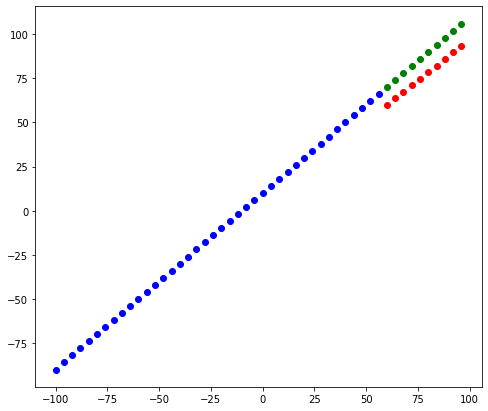

In [ ]:
#compile it
#fit it
#predict it
#visualize it

tf.random.set_seed(42)

myCompiler(model)

myFitter(model, xTrain, yTrain, 100, 0)


pred1 = model.predict(xTest)


visualizer(pred1)

mae1 = mae(yTest, pred1)

mse1 = mse(yTest, pred1)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


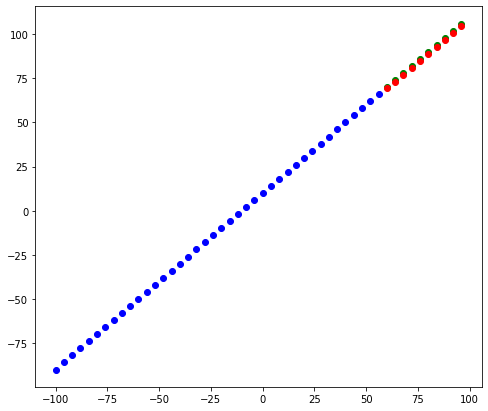

In [ ]:
#Model 2

tf.random.set_seed(42)

myCompiler(model2)


myFitter(model2, xTrain, yTrain, 100, 0)

pred2 = model2.predict(xTest)

visualizer(pred2)

mae2 = mae(yTest, pred2) 
mse2 = mse(yTest, pred2)



/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


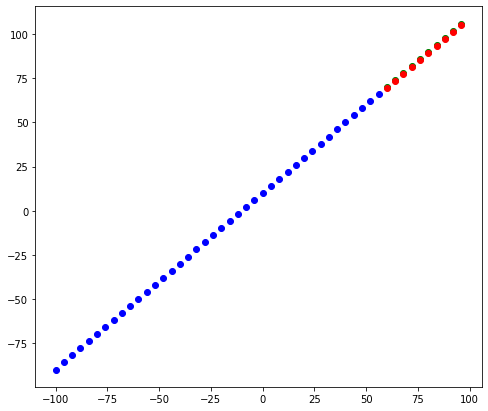

In [ ]:
#Model 3

tf.random.set_seed(42)

myCompiler(model3)


#myModel
#X training data
#Y training data
#Epochs
#Verbose
myFitter(model3, xTrain, yTrain, 500, 0)

pred3 = model3.predict(xTest)

visualizer(pred3)

mae3 = mae(yTest, pred3)
mse3 = mse(yTest, pred3)

In [ ]:
#comparing the data for our three models

import pandas as pd

results = [["Model-1", mae1, mse1],
           ["Model-2", mae2, mse2],
           ["Model-3", mae3, mse3]]


FinalData = pd.DataFrame(results, columns= ["Model", "MAE", "MSE"])

FinalData


,Model,MAE,MSE
0,Model-1,11.410288,130.817184
1,Model-2,0.984412,0.986979
2,Model-3,0.857654,0.753150


In [ ]:
model3.save("Model-2-V1")


model3.save("Model-2-V2.h5")

INFO:tensorflow:Assets written to: Model-2-V1/assets


In [ ]:
saved = tf.keras.models.load_model("Model-2-V1")

saved.summary(), model3.summary()

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 50)                100       
                                                                 
 dense_76 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 50)                100       
                                                                 
 dense_76 (Dense)            (None, 1)                 51        
                                                                 
Total params: 151
Trainable para

(None, None)

In [ ]:
#comparing values to make sure the saved model is the same as the original

f = saved.predict(xTest)
f1 =  model3.predict(xTest)

f == f1

h5saved = tf.keras.models.load_model("Model-2-V2.h5")

# h5saved.summary(), model3.summary()


h5saved.predict(xTest) == model3.predict(xTest)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
#Downloading files from google colab using the code


from google.colab import files


files.download("/content/Model-2-V2.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# New Section